In [2]:
import matplotlib.pyplot as plt
import sys
from glob import glob
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
import numpy as np
import seaborn as sns
import DNSmodule as dns
import pandas as pd

params = {'legend.fontsize':'x-large','font.size':10,'axes.labelsize': 'xx-large','xtick.labelsize':'xx-large','ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
#plt.style.use('ggplot')

In [3]:
files = glob('fixedRe/*.b_*spc')

ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus,lbs,viscs, Pms, Ns, kps = dns.get_data_MHD(files)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs,lus,lbs, viscs, Pms, Ns, kps, files = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files, idx_sort)
idx_sort = np.argsort(kps)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files, idx_sort)


In [6]:
def resolution_check(files):
    

    ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(files)
    idx_sort = np.argsort(Pms)
    ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, files = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, files, idx_sort)
    colors = sns.color_palette('hls',len(files))
    for id_f, f in enumerate(files):
        lu = lus[id_f]
        lb = lbs[id_f]
        Pm = Pms[id_f]
        N = Ns[id_f]
        visc = viscs[id_f]
        kmax = ks[id_f].max()
        time = times[id_f]
        plt.plot(time,kmax*lu,c=colors[id_f],lw=2,label='{} {} {}'.format(N,visc,Pm))
        plt.plot(time,kmax*lb,c=colors[id_f])
        if (True in (kmax * lu < 1.25 )) or (True in (kmax * lb < 1.25 )):
            print(f)
        
    plt.legend()
    plt.hlines(1.25,0,5,color='0.7',ls='--')
    plt.xlim(0.01,5)
    plt.yscale('log')
    plt.xscale('log')
    #plt.ylim(0.6,2)
    plt.show()

# Comparing different k_peaks and different viscs with fixed Re.

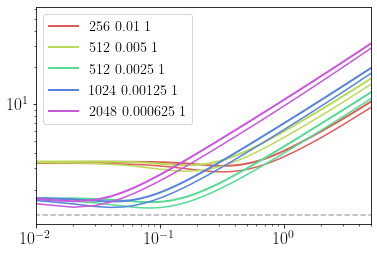

In [7]:
resolution_check(files)

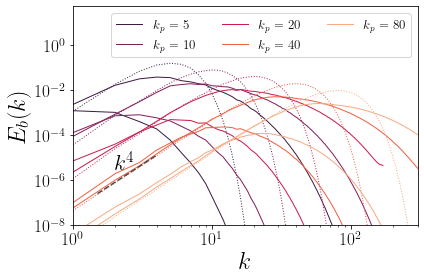

In [8]:
# Produce spectrum evolution Hardcoded times and label starting index
fig, ax = plt.subplots()
t = [0,499]

t1 = 80
t2 = 1600
ts = [[0,t1,t2],[0,int(t1/2),int(t2/2)],[0,int(t1/4),int(t2/4)],[0,int(t1/8),int(t2/8)],[0,int(t1/16),int(t2/16)],[0,int(t1/32),int(t2/32)]]
T0s = []
colors = sns.color_palette("rocket",len(files))
for idx, f in enumerate(files):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    Lu = Lus[idx]
    U = Us[idx]
    T0s.append(Lu[0]/U[0])
    k = ks[idx]
    kp = kps[idx]

    
    for id_tt,idx_t in enumerate(ts[idx]):
        if id_tt==0 :
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=1,ls=':')
        elif id_tt ==1:            
            ax.plot(k,Bk[idx_t],c=colors[idx],lw = 1,label ='$k_p$ = {}'.format(int(kp)))
        else:            
            ax.plot(k,Bk[idx_t],c=colors[idx],lw = 1)

T0s = np.array(T0s)
k_slope = np.array([1.5,4])
ax.plot(k_slope,5e-8*np.power(k_slope,4),c='0.3',ls='--')
ax.text(2,3e-6,'$k^{4}$',size=22)
k2_slope = np.array([10,40])
#ax.plot(k2_slope,7e-3*np.power(k_slope,-2),c='0.3',ls='-')
#ax.plot(k2_slope,5e-2*np.power(k_slope,-3/2),c='0.3',ls='--')
#ax.plot(k2_slope,5e-1*np.power(k_slope,-5/3),c='0.3',ls=':')
#ax.text(30,3e-2,'$k^{-2}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_b(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.set_ylim(1e-8,5e1)
ax.set_xlim(1,300)
ax.legend(loc=1,ncol=3,fontsize=13)
fig.tight_layout()
fig.savefig('Spectrum_fixed_Re.pdf',format='pdf')


In [19]:
tt = t2
(np.array([tt,tt/2,tt/4,tt/8,tt/16,tt/32]))/(100*T0s)

array([20.59851143, 20.60020747, 20.60038304, 20.60037174, 20.51872166,
       20.5187194 ])

In [40]:
np.array([5,2.5,1.25,0.625,0.3125,0.15625])/T0s

array([6.43703482, 6.43756483, 6.4376197 , 6.43761617, 6.41210052,
       6.41209981])

In [4]:
for id_f,f in enumerate(files):
    time = times[id_f]
    T = Tus[id_f]
    T = T[0]
    for _t in time:
        if (_t/T > 6):
            print(_t)
            break

4.67
2.34
1.17
0.59
0.3
0.15


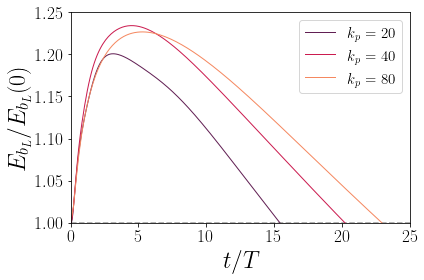

In [9]:
files
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(files)
idx_sort = np.argsort(kps)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, files = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, files, idx_sort)

#plt.style.use('ggplot')

figE, axE1 = plt.subplots()

colors = sns.color_palette('rocket',len(files)-2)

for id_f,f in enumerate(files):
    B    = Bs[id_f]
    Bk = Bks[id_f]
    T = Tus[id_f]
    Lu = Lus[id_f]
    U = Us[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    k = ks[id_f]
    kp = int(kps[id_f])
    #print(kp)
    k_lim = int(np.ceil(kp/5))
    #print(k_lim)
    B3 = dns.integrate(Bk,0,k_lim,k)
    if kp >=20:
        axE1.plot(time[:-1]/T[0], B3/B3[0], color=colors[id_f-2],ls=(':' if Pm==16 else '-'), lw=(3 if Pm==16 else 1),label = '$k_p$ = {}'.format(kp))

    

#axE1.set_xscale('log')
#axE1.set_yscale('log')
axE1.set_ylabel('$E_{b_{L}}/E_{b_{L}}(0)$',size = 24)
axE1.set_xlabel('$t/T$',size = 24)
axE1.legend(fontsize=15,ncol=1)
axE1.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axE1.set_xlim(0,25)
axE1.set_ylim(1,1.25)



figE.tight_layout()
figE.savefig('E3_vs_t_fixedRe.pdf',format='pdf')

plt.show()

In [13]:
for id_f,f in enumerate(files):
    T = Tus[id_f]
    Lu = Lus[id_f]
    U = Us[id_f]
    TT = Lu[0]/U[0]
    
    #print(T[0])
    #print(TT)
    

0.02436799247420895
0.02436799247420895
0.04873597959284436
0.04873597959284436
0.09708562667484087
0.09708562667484087
0.19417114687447198
0.19417114687447198
0.3883456034656999
0.3883456034656999
0.7767551580106224
0.7767551580106224


In [38]:
Res = []
k_maxs = []
NHs = []
for id_f,f in enumerate(files):
    Res.append(Us[idx][0]*Lus[id_f][0]/viscs[id_f])
    k_maxs.append(ks[id_f][-1])
    NHs.append('NH\textsubscript k_p{}'.format(int(kps[id_f])))


df= pd.DataFrame({'Run':NHs,'$P_m$': Pms,'$\\nu$': viscs,'$Re$': Res,'$k_p$': kps.astype(int), '$N$':Ns})
df = df.round({'$\\nu$': 5,'$Re$': 1,'$P_m$': 5,'$k_p$': 1, '$N$':0})
print(df.to_latex(index = False,escape=False))

\begin{tabular}{lrrrrr}
\toprule
                     Run &  $P_m$ &    $\nu$ &  $Re$ &  $k_p$ &   $N$ \\
\midrule
   NH\textsubscript k_p5 &      1 &  0.01000 &  32.2 &      5 &   256 \\
  NH\textsubscript k_p10 &      1 &  0.00500 &  32.2 &     10 &   512 \\
  NH\textsubscript k_p20 &      1 &  0.00250 &  32.2 &     20 &   512 \\
  NH\textsubscript k_p40 &      1 &  0.00125 &  32.2 &     40 &  1024 \\
  NH\textsubscript k_p80 &      1 &  0.00062 &  32.2 &     80 &  2048 \\
 NH\textsubscript k_p160 &      1 &  0.00031 &  32.2 &    160 &  2048 \\
\bottomrule
\end{tabular}



5.0 	 0.777
10.0 	 0.388
20.0 	 0.194
40.0 	 0.097
80.0 	 0.049


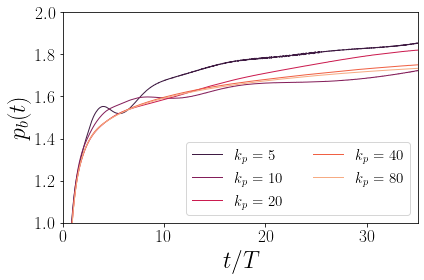

In [10]:
#produce time decay plots hardcoded 

fign,axn = plt.subplots()
p = []
q = []
ps = []
qs = []
T0s = []
colors = sns.color_palette('rocket',len(files))
for idx, f in enumerate(files):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    U = Us[idx]
    Lu = Lus[idx]
    Lb = Lbs[idx]
    Tu = Tus[idx]
    kp = kps[idx]
    
    print(kp,'\t {:.3f}'.format(Tu[0]))
    T0s.append(Tu[0])
    time = times[idx]
    visc = viscs[idx]
    Re = U[0]*Lu[0]/visc
    
    #print(Re)
    kp = kps[idx]
    n = -np.gradient(np.log(B[1:]),np.log(time[1:]))
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[-200:]), np.log(B[-200:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[-200:]), np.log(Lb[-200:]), 1)
    q.append(mq)
    #print[n[]]
    ps.append(n)
    #if kp >=40:
    axn.plot(time[1:]/Tu[0],n,c=colors[idx],lw=1,label='$k_p$ = {}'.format(int(kp)))
    
#print(p)
#axn.set_xscale('log')
#axn.set_yscale('log')
axn.set_ylabel('$p_b(t)$',size = 24)
axn.set_xlabel('$t/T$',size = 24)
axn.set_xlim(0,35)
#axn.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axn.set_ylim(1,2)
axn.legend(fontsize=15,ncol=2,loc=4)


fign.tight_layout()

fign.savefig('p_vs_t_fixedRe.pdf',format='pdf')
plt.show()

t

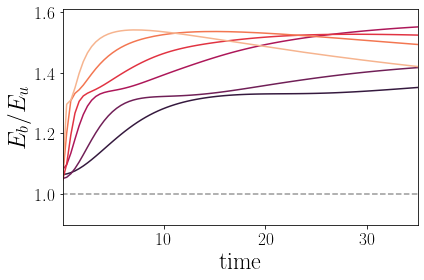

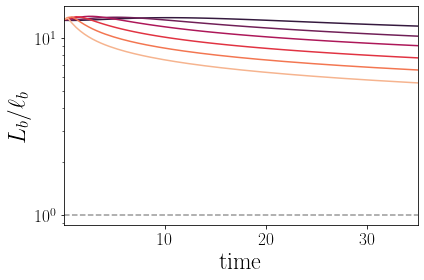

In [44]:
figE, axE = plt.subplots()
figL, axL = plt.subplots()

col_NH = sns.color_palette('rocket',len(files))

for id_f,f in enumerate(files):
    B    = Bs[id_f]
    E = Es[id_f]
    Lb   = Lbs[id_f]
    lb = lbs[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    T=Tus[idx][0]
    axE.plot(time/T,B/E, color=colors[id_f], label = 'Pm = {}'.format(Pm))
    axL.plot(time/T,Lb/lb, color=colors[id_f], label = 'Pm = {}'.format(Pm))
    
#axE.set_xscale('log')
#axE.set_yscale('log')
axE.set_ylabel('$E_{b}/E_u$',size = 24)
axE.set_xlabel('time',size = 24)
#axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}/\ell_b$',size = 24)
axL.set_xlabel('time',size = 24)
#axE.legend(fontsize=10)
#axL.legend(fontsize=10)
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE.set_xlim(1e-2,35)
axL.set_xlim(1e-2,35)
figE.tight_layout()
#figE.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

In [61]:
idx = 0
times[idx]/Tus[idx][0]
Tus[idx][0]

0.7767551580106224